<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Gulsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Gulsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


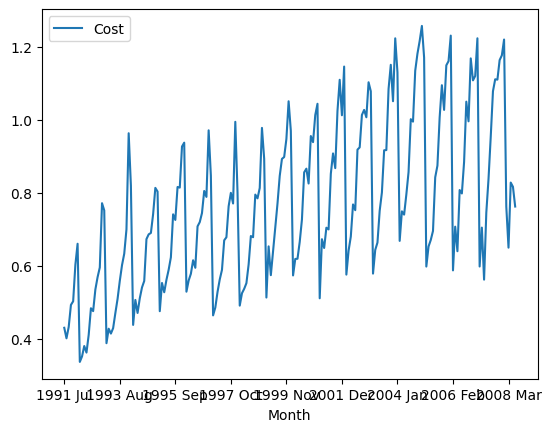

In [1]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [2]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


1.
H₀ (Null Hypothesis): The time series has a unit root → it is non-stationary.

H₁ (Alternative Hypothesis): The time series does not have a unit root → it is stationary.

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ap1['Cost'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.6967562070359723
p-value: 0.4327845468304359


If p-value > 0.05, fail to reject H₀ → data is non-stationary.

If p-value ≤ 0.05, reject H₀ → data is stationary.

2.
Same hypothesis

In [4]:
ap1_diff = ap1['Cost'].diff().dropna()
ap1_seasonal_diff = ap1_diff.diff(12).dropna()

result2 = adfuller(ap1_seasonal_diff)
print('ADF Statistic (after diff):', result2[0])
print('p-value:', result2[1])


ADF Statistic (after diff): -5.0704032797158645
p-value: 1.6072834959666577e-05


If p-value > 0.05, fail to reject H₀ → data is non-stationary.

If p-value ≤ 0.05, reject H₀ → data is stationary.

3.

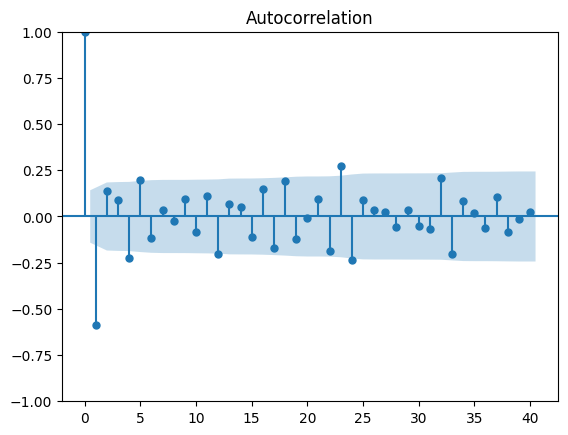

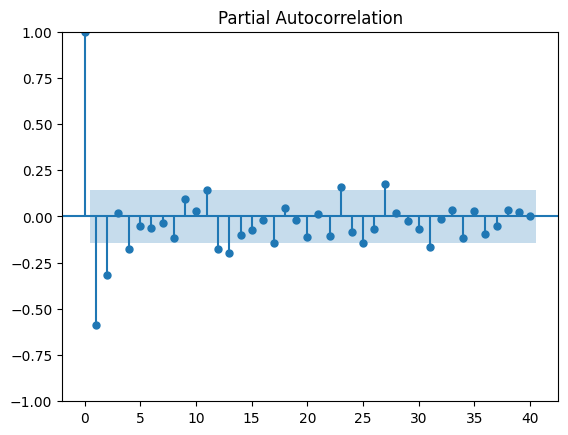

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ap1_seasonal_diff, lags=40)
plot_pacf(ap1_seasonal_diff, lags=40)
pyplot.show()


4.

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(ap1['Cost'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
model2 = SARIMAX(ap1['Cost'], order=(2,1,0), seasonal_order=(0,1,1,12)).fit()

print("Model 1 AIC:", model1.aic)
print("Model 2 AIC:", model2.aic)


C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing 

Model 1 AIC: -554.6784151153622
Model 2 AIC: -560.000027779616


5.

In [7]:
train = ap1.iloc[:-12]
test = ap1.iloc[-12:]


6.

C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing 

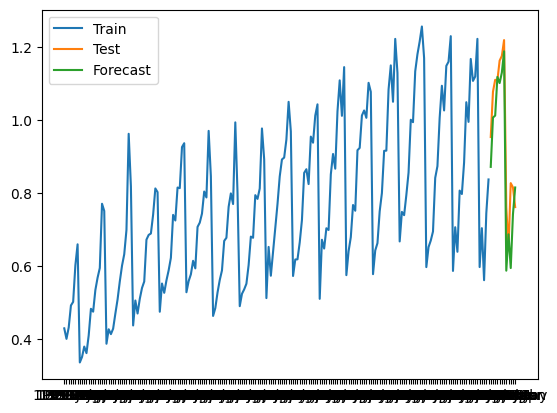

MAE: 0.0808238386783945
MSE: 0.010203528932485686
MAPE: nan%


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = SARIMAX(train['Cost'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
forecast = model.predict(start=len(train), end=len(ap1)-1, dynamic=False)

# Plot
pyplot.plot(train.index, train['Cost'], label='Train')
pyplot.plot(test.index, test['Cost'], label='Test')
pyplot.plot(test.index, forecast, label='Forecast')
pyplot.legend()
pyplot.show()

# Evaluation
mae = mean_absolute_error(test['Cost'], forecast)
mse = mean_squared_error(test['Cost'], forecast)
mape = np.mean(np.abs((test['Cost'] - forecast) / test['Cost'])) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}%")


7.

In [10]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, HoltWinters, AutoTheta, MSTL
from statsforecast.utils import AirPassengersDF

sf = StatsForecast(
    models=[
        AutoARIMA(season_length=12),
        AutoETS(season_length=12),
        HoltWinters(season_length=12),
        AutoTheta(season_length=12),
        MSTL(season_length=12)
    ],
    freq='M',
    n_jobs=-1
)

ap1_reset = ap1.reset_index()
ap1_reset.columns = ['ds', 'y']
ap1_reset['unique_id'] = 'h02'

forecast_df = sf.forecast(df=ap1_reset, h=12)
print(forecast_df.head())


C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\utilsforecast\validation.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(times)


                  ds  AutoARIMA   AutoETS  HoltWinters  AutoTheta      MSTL
unique_id                                                                  
h02       2008-06-30   1.030063  0.941744     0.966938   0.947466  0.963868
h02       2008-07-31   1.007223  0.994053     1.079332   1.010625  1.034552
h02       2008-08-31   1.102301  1.047695     1.107029   1.068389  1.091474
h02       2008-09-30   1.155966  1.107990     1.148039   1.126294  1.141776
h02       2008-10-31   1.143878  1.123985     1.171523   1.147741  1.155327


C:\Users\Gulsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [12]:
forecast_df.head(12)


,ds,AutoARIMA,AutoETS,HoltWinters,AutoTheta,MSTL
unique_id,,,,,,
h02,2008-06-30,1.030063,0.941744,0.966938,0.947466,0.963868
h02,2008-07-31,1.007223,0.994053,1.079332,1.010625,1.034552
h02,2008-08-31,1.102301,1.047695,1.107029,1.068389,1.091474
h02,2008-09-30,1.155966,1.107990,1.148039,1.126294,1.141776
h02,2008-10-31,1.143878,1.123985,1.171523,1.147741,1.155327
h02,2008-11-30,1.220987,1.267593,1.193462,1.288870,1.197035
h02,2008-12-31,1.233804,1.225948,1.236956,1.253697,1.212297
h02,2009-01-31,0.719815,0.659611,0.695484,0.672279,0.664972
h02,2009-02-28,0.721342,0.738626,0.696541,0.757283,0.720262


In [13]:
test.head(12)

,Cost
Month,
2007 Jul,0.954144
2007 Aug,1.078219
2007 Sep,1.110982
2007 Oct,1.109979
2007 Nov,1.163534
2007 Dec,1.176589
2008 Jan,1.219941
2008 Feb,0.761822
2008 Mar,0.649435


In [16]:
from sklearn.metrics import mean_squared_error

# Drop non-model columns
model_columns = ['AutoARIMA', 'AutoETS', 'HoltWinters', 'AutoTheta', 'MSTL']

for col in model_columns:
    mse = mean_squared_error(test['Cost'].values, forecast_df[col].values)
    print(f"{col} - MSE: {mse}")


AutoARIMA - MSE: 0.0024891841957277155
AutoETS - MSE: 0.0044895886836548255
HoltWinters - MSE: 0.0017386230901636245
AutoTheta - MSE: 0.004715867634220061
MSTL - MSE: 0.0030269016264651877
